In [1]:
# Essential Libraries
import os
import sys
import numpy as np
import pandas as pd
import datetime
import random

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
sns.set_style("whitegrid");
sns.set_color_codes(palette='pastel');


# ML
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


pd.set_option('display.float_format', lambda x: '%.3f' % x);
pd.set_option('display.max_columns', None);
pd.options.display.max_seq_items = 8000;
pd.options.display.max_rows = 8000;

import warnings
warnings.filterwarnings(action="ignore");

PROJECT_ROOT_DIR = "."
DATA_DIR = os.path.join(PROJECT_ROOT_DIR, "data")
IMAGE_DIR = os.path.join(PROJECT_ROOT_DIR, "img")

from IPython.display import Image
for d in [DATA_DIR, IMAGE_DIR]:
    if not os.path.exists(d):
        os.mkdir(d)
        
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
data = pd.read_csv('diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.230,Ideal,E,SI2,61.500,55.000,326,3.950,3.980,2.430
1,0.210,Premium,E,SI1,59.800,61.000,326,3.890,3.840,2.310
2,0.230,Good,E,VS1,56.900,65.000,327,4.050,4.070,2.310
3,0.290,Premium,I,VS2,62.400,58.000,334,4.200,4.230,2.630
4,0.310,Good,J,SI2,63.300,58.000,335,4.340,4.350,2.750


In [3]:
df = data.copy()
df.shape

(53940, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.000,0.798,0.474,0.200,0.400,0.700,1.040,5.010
depth,53940.000,61.749,1.433,43.000,61.000,61.800,62.500,79.000
table,53940.000,57.457,2.234,43.000,56.000,57.000,59.000,95.000
price,53940.000,3932.800,3989.440,326.000,950.000,2401.000,5324.250,18823.000
x,53940.000,5.731,1.122,0.000,4.710,5.700,6.540,10.740
y,53940.000,5.735,1.142,0.000,4.720,5.710,6.540,58.900
z,53940.000,3.539,0.706,0.000,2.910,3.530,4.040,31.800


In [6]:
# It seems there are no Null Values.
# Let's Confirm
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Data Preprocessing
* We see values with x(min), y(min) and z(min) as 0, which isn't possible.
* let's exammine these values in detail.

In [7]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.000,Premium,G,SI2,59.100,59.000,3142,6.550,6.480,0.000
2314,1.010,Premium,H,I1,58.100,59.000,3167,6.660,6.600,0.000
4791,1.100,Premium,G,SI2,63.000,59.000,3696,6.500,6.470,0.000
5471,1.010,Premium,F,SI2,59.200,58.000,3837,6.500,6.470,0.000
10167,1.500,Good,G,I1,64.000,61.000,4731,7.150,7.040,0.000
11182,1.070,Ideal,F,SI2,61.600,56.000,4954,0.000,6.620,0.000
11963,1.000,Very Good,H,VS2,63.300,53.000,5139,0.000,0.000,0.000
13601,1.150,Ideal,G,VS2,59.200,56.000,5564,6.880,6.830,0.000
15951,1.140,Fair,G,VS1,57.500,67.000,6381,0.000,0.000,0.000
24394,2.180,Premium,H,SI2,59.400,61.000,12631,8.490,8.450,0.000


In [8]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

* We can see there are 20 rows with Dimensions 'Zero'.
* We'll Drop them as it seems better choice instead of filling them with any of Mean or Median.

In [9]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

# Just to Confirm
len(df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)])

0

In [10]:
columns = list(df.columns.values)
columns.pop(columns.index('price'))
df = df[columns + ['price']]

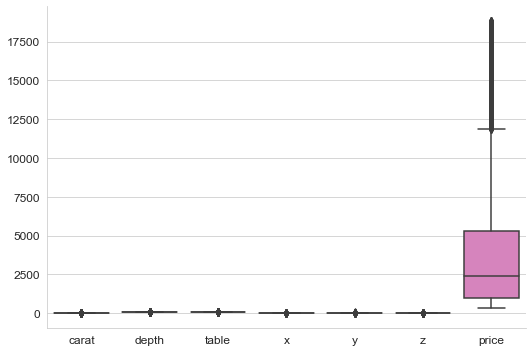

In [11]:
sns.factorplot(data=df , kind='box' , size=5, aspect = 1.5);

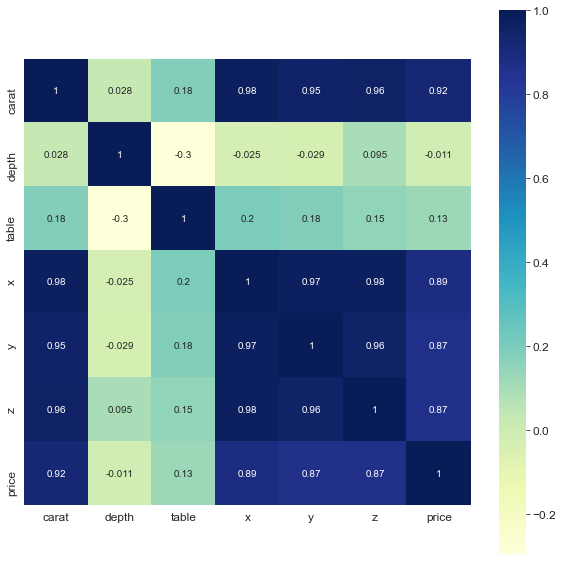

In [12]:
# Correlation Map
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=corr, square=True, annot=True, cmap="YlGnBu", cbar=True);

CONCLUSIONS :
1. Depth is inversely related to Price.

      This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.
        
2. The Price of the Diamond is highly correlated to Carat, and its Dimensions.

3. The Weight (Carat) of a diamond has the most significant impact on its Price.

      Since, the larger a stone is, the Rarer it is, one 2 carat diamond will be more 'Expensive' than the total cost of two 1 Carat Diamonds of the same Quality.
        
4. The Length(x) , Width(y) and Height(z) seems to be higly related to Price and even each other.

5. Self Relation ie. of a feature to itself is 1 as expected.

6. Some other Inferences can also be drawn based on correlation between different features.

In [13]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

In [14]:
data = df.copy()

5 Point Summary of Carat Attribute:
Carat(min) : 0.2
Q1                    : 0.4
Q2(Median)            : 0.7
Q3                    : 1.04
Carat(max) : 5.01


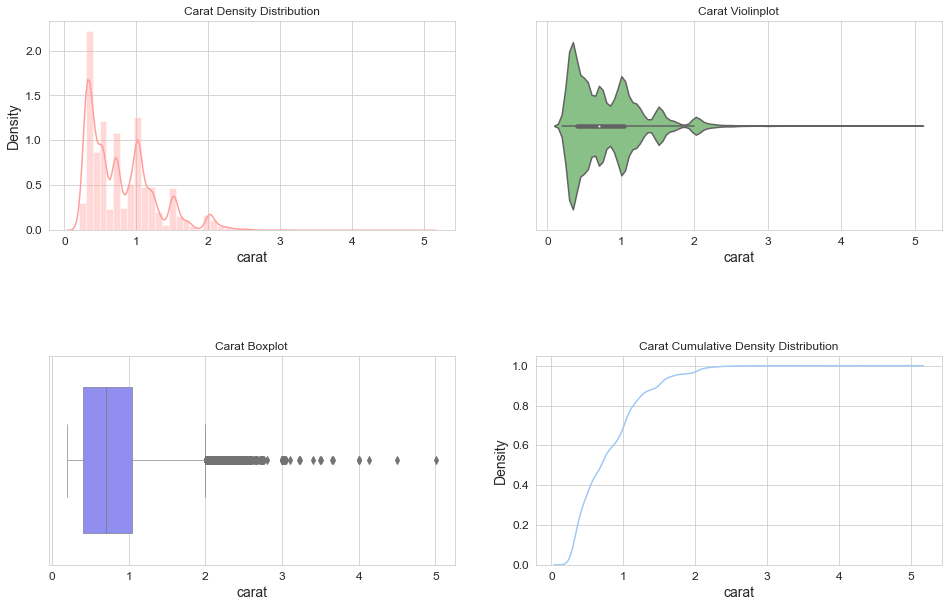

In [15]:
summary('carat')

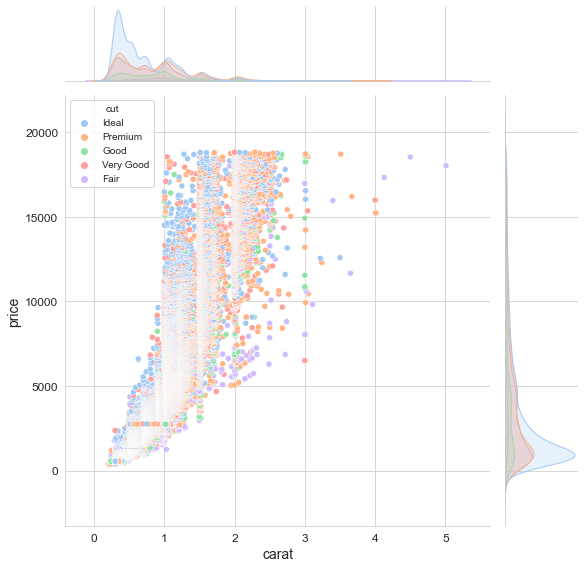

In [16]:
sns.jointplot(x='carat', y='price', hue = 'cut', size = 8, data=df);

### Univariate Analysis: 'cut'

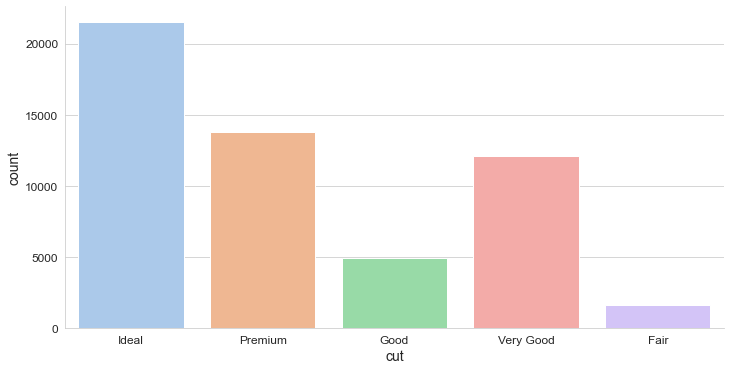

In [17]:
sns.factorplot(x='cut', data=df , kind='count',aspect=2);

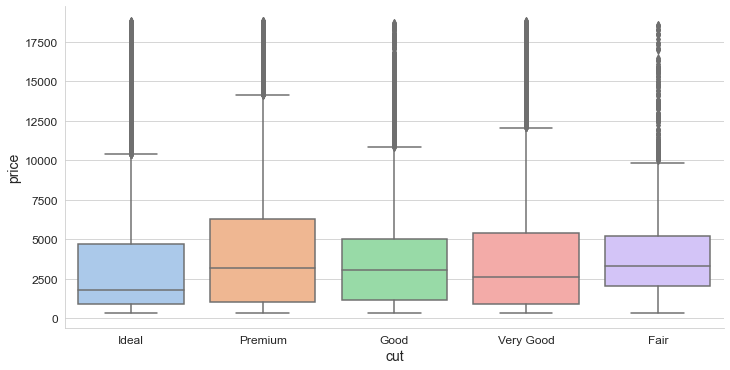

In [18]:
# Relationship between cut and price
sns.factorplot(x='cut', y='price', data=df, kind='box' ,aspect=2 )

#### Understanding Box Plot :

* The bottom line indicates the min value of Age.
* The upper line indicates the max value.
* The middle line of the box is the median or the 50% percentile.
* The side lines of the box are the 25 and 75 percentiles respectively.

### Univariate Analysis: 'colour'

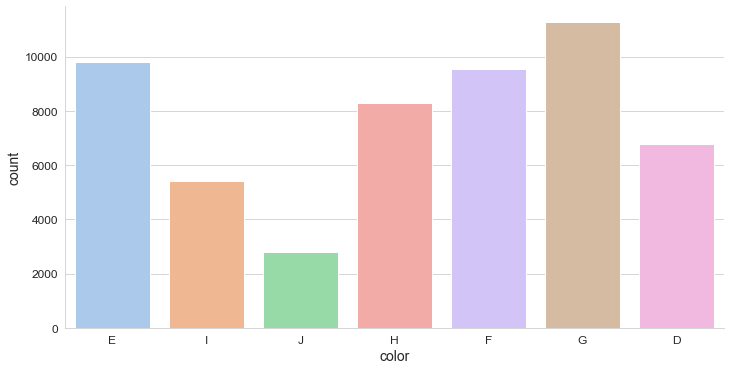

In [19]:
sns.factorplot(x='color', data=df , kind='count', aspect=2)

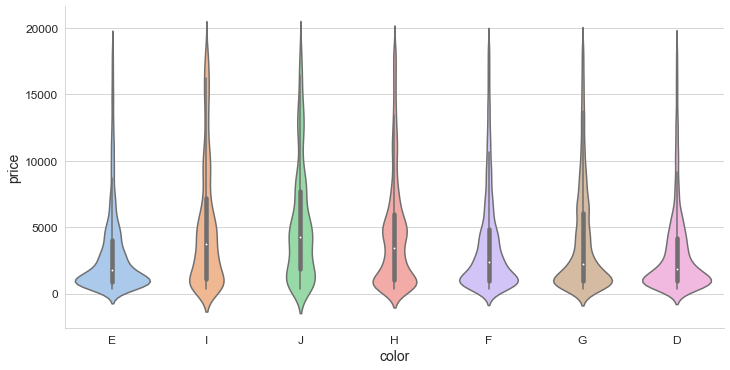

In [20]:
# Colour vs price
sns.factorplot(x='color', y='price' , data=df , kind='violin', aspect=2)

### Univariate Analysis: 'clarity'

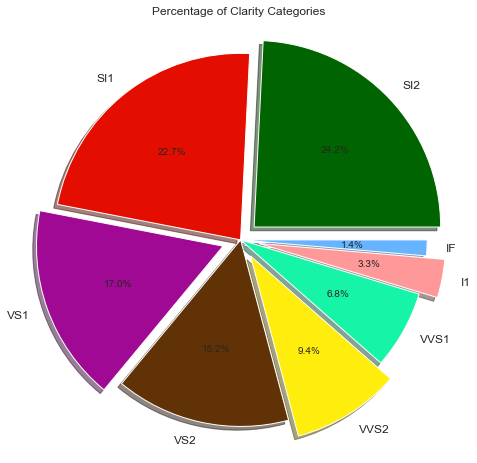

In [21]:
labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

<AxesSubplot:xlabel='clarity', ylabel='price'>

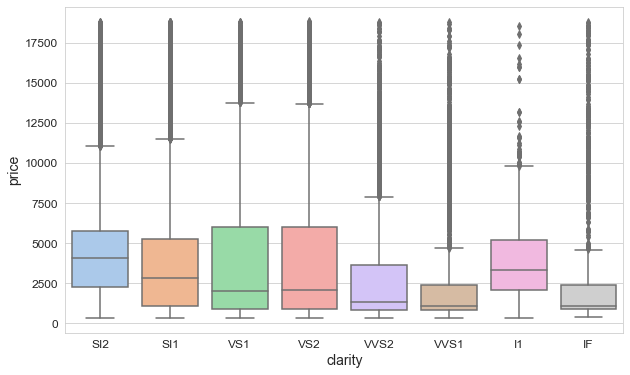

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='clarity', y='price', data=df)

It seems that VS1 and VS2 affect the Diamond's Price equally having quite high Price margin.
### Univariate analysis: 'Depth'

5 Point Summary of Depth Attribute:
Depth(min) : 43.0
Q1                    : 61.0
Q2(Median)            : 61.8
Q3                    : 62.5
Depth(max) : 79.0


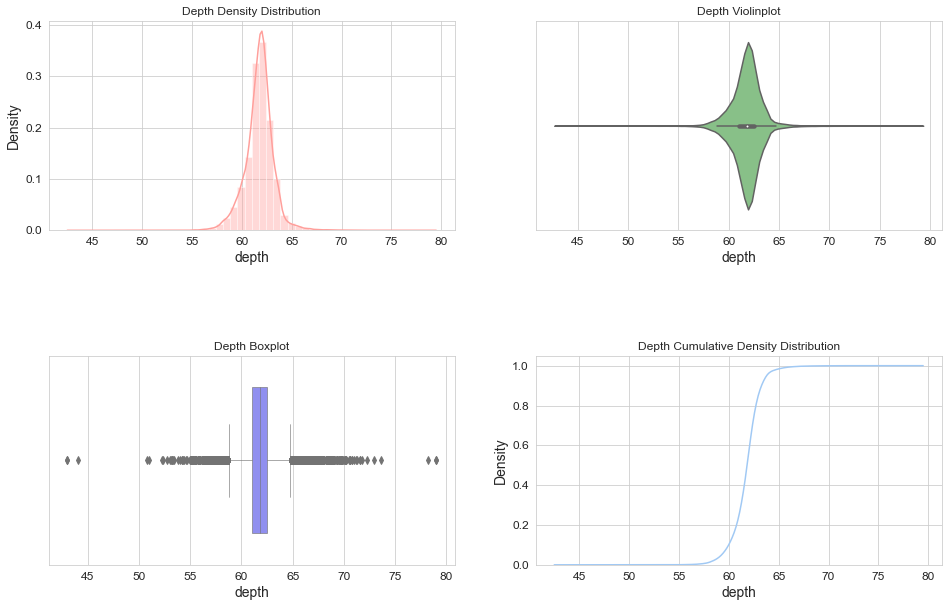

In [23]:
summary('depth')

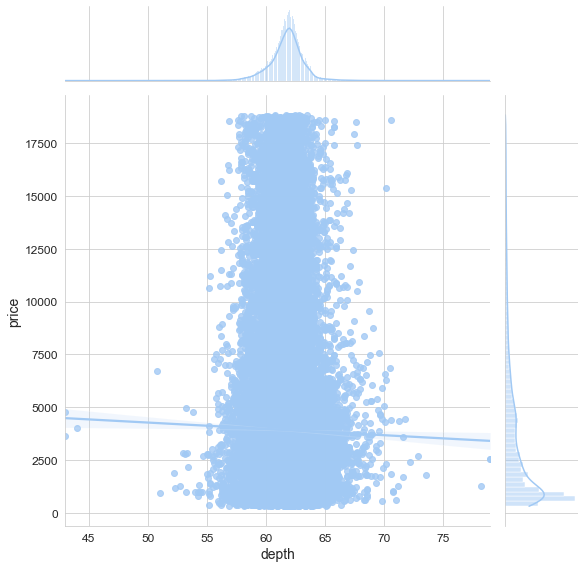

In [24]:
sns.jointplot(x='depth', y='price', kind = 'reg', size = 8, data=df);

* We can Infer from the plot that the Price can vary heavily for the same Depth.
* And the Pearson's Correlation shows that there's a slightly inverse relation between the two.
### Univariate analysis: 'Table'

5 Point Summary of Table Attribute:
Table(min) : 43.0
Q1                    : 56.0
Q2(Median)            : 57.0
Q3                    : 59.0
Table(max) : 95.0


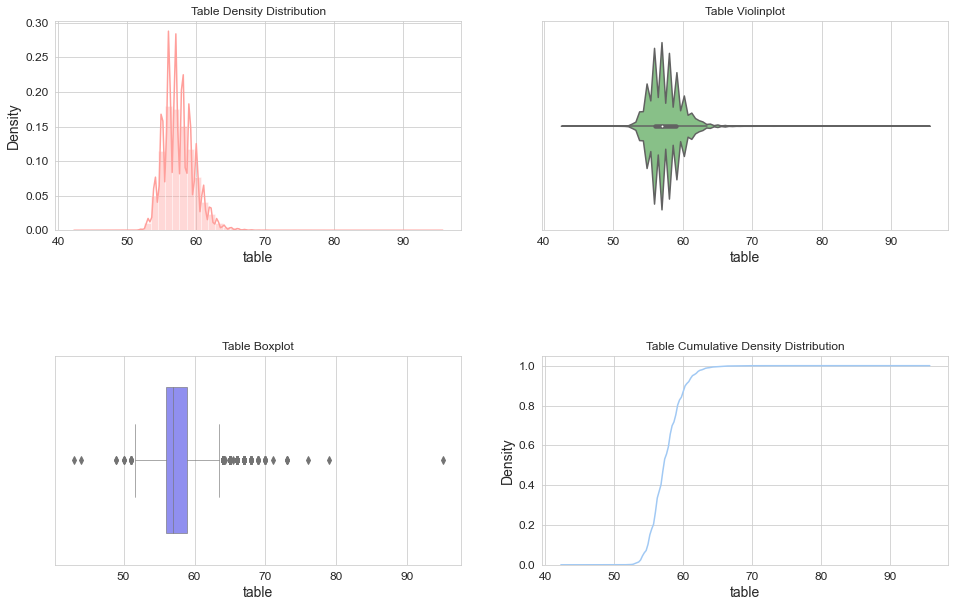

In [25]:
summary('table')

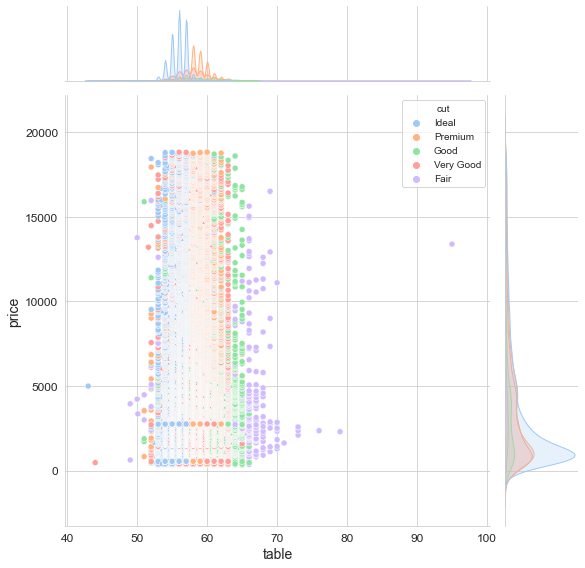

In [26]:
sns.jointplot(x='table', y='price', hue = 'cut', size = 8, data=df);

### Univariate Analysis: 'Dimention'

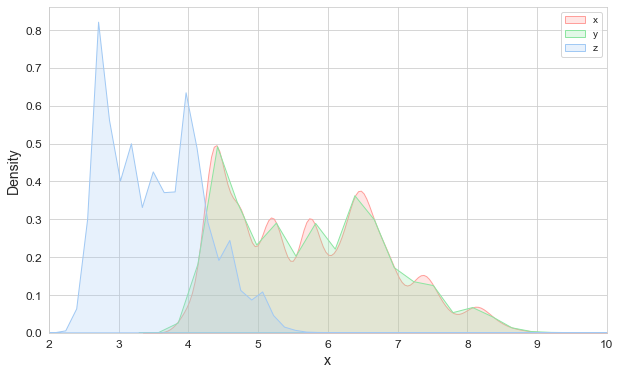

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(df['x'] ,shade=True , color='r', label = 'x')
sns.kdeplot(df['y'] , shade=True , color='g', label = 'y')
sns.kdeplot(df['z'] , shade= True , color='b', label = 'z')
plt.legend()
plt.xlim(2,10);

As the Dimensions increases, Obviously the Prices rises as more and more Natural Resources are Utilised.

### Feature Engineering
#### Create new feature: 'Volume'

In [28]:
df['volume'] = df['x']*df['y']*df['z']
columns = list(df.columns.values)
columns.pop(columns.index('price'))
df = df[columns + ['price']]
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,volume,price
0,0.230,Ideal,E,SI2,61.500,55.000,3.950,3.980,2.430,38.202,326
1,0.210,Premium,E,SI1,59.800,61.000,3.890,3.840,2.310,34.506,326
2,0.230,Good,E,VS1,56.900,65.000,4.050,4.070,2.310,38.077,327
3,0.290,Premium,I,VS2,62.400,58.000,4.200,4.230,2.630,46.725,334
4,0.310,Good,J,SI2,63.300,58.000,4.340,4.350,2.750,51.917,335


5 Point Summary of Volume Attribute:
Volume(min) : 31.707984
Q1                    : 65.18975850000001
Q2(Median)            : 114.84018
Q3                    : 170.846415
Volume(max) : 3840.5980600000003


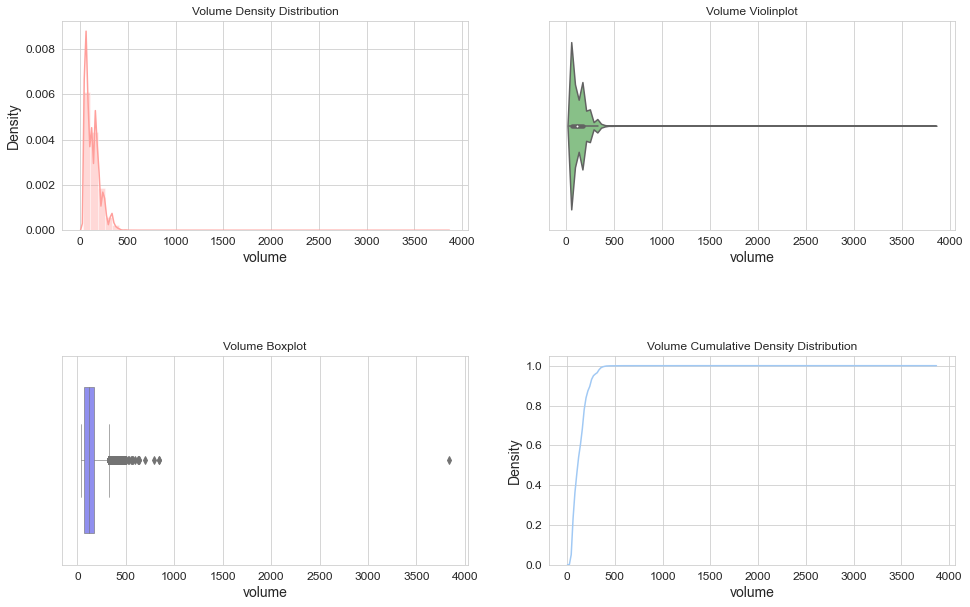

In [29]:
data = df.copy()
summary('volume')

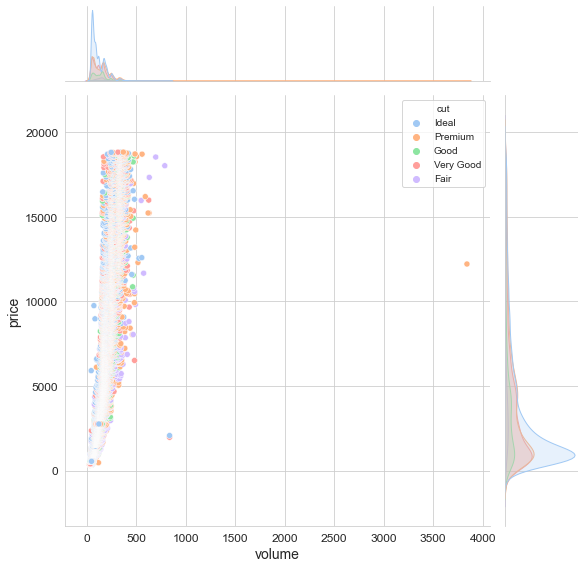

In [30]:
sns.jointplot(x='volume', y='price', hue = 'cut', size = 8, data=df);

It seems that there is Linear Relationship between Price and Volume (x * y * z).

### Data Preprocessing
* Label the Categorical Features with digits to distinguish as we can't feed String data for Modelling.

In [31]:
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [32]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,volume,price
0,0.230,2,1,3,61.500,55.000,3.950,3.980,2.430,38.202,326
1,0.210,3,1,2,59.800,61.000,3.890,3.840,2.310,34.506,326
2,0.230,1,1,4,56.900,65.000,4.050,4.070,2.310,38.077,327
3,0.290,3,5,5,62.400,58.000,4.200,4.230,2.630,46.725,334
4,0.310,1,6,3,63.300,58.000,4.340,4.350,2.750,51.917,335


### Feature Scaling

In [33]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Building

In [35]:
# Collect all R2 Scores.
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' , 'KNeighbours Regression']

### Linear Regression

In [36]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, n_jobs = -1, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.



####### Linear Regression #######
Score : 0.8848
[0.88565055 0.87875432 0.883719   0.88704588 0.18032865]

MSE    : 1729842.82 
MAE    : 841.08 
RMSE   : 1315.23 
R2     : 0.88 


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


### Lasso Regression

In [37]:
clf_la = Lasso(normalize=True)
clf_la.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_la.predict(X_test)
print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % clf_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Lasso Regression ######
Score : 0.8638
[0.86603777 0.86229648 0.86593654 0.87127173 0.68307153]

MSE    : 2045942.89 
MAE    : 905.48 
RMSE   : 1430.36 
R2     : 0.86 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


### Ridge Regressor

In [38]:
clf_rr = Ridge(normalize=True)
clf_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


###### Ridge Regression ######
Score : 0.8018
[0.80753912 0.80931174 0.8100093  0.81769247 0.79331251]

MSE    : 2976621.36 
MAE    : 1108.01 
RMSE   : 1725.29 
R2     : 0.80 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


### ADABoost Regressor

In [39]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### AdaBoost Regression ######
Score : 0.8424
[0.86610824 0.84391157 0.84121801 0.85708918 0.85522227]

MSE    : 2367441.13 
MAE    : 1261.12 
RMSE   : 1538.65 
R2     : 0.84 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.1s finished


### GB Regressor

In [40]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1    14243642.3969            1.68s
         2    12627580.4973            1.66s
         3    11280321.2730            1.61s
         4    10084859.6478            1.56s
         5     9096996.2399            1.52s
         6     8208921.1317            1.48s
         7     7464688.7284            1.47s
         8     6820693.2104            1.46s
         9     6253015.6843            1.44s
        10     5773835.1131            1.43s
        20     3202412.9060            1.24s
        30     2380547.3873            1.07s
        40     2086199.0497            0.91s
        50     1909397.8886            0.76s
        60     1776560.1848            0.61s
        70     1675144.3478            0.45s
        80     1597170.0029            0.30s
        90     1535901.6210            0.15s
       100     1487396.8704            0.00s
      Iter       Train Loss   Remaining Time 
         1    14237568.3660            1.85s
        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


        20     3182859.6762            1.03s
        30     2359840.4361            0.89s
        40     2067808.4555            0.76s
        50     1891507.0751            0.63s
        60     1759531.1287            0.51s
        70     1658856.6693            0.38s
        80     1581203.9052            0.25s
        90     1520039.7061            0.13s
       100     1471585.2041            0.00s
      Iter       Train Loss   Remaining Time 
         1    14291245.9676            1.28s
         2    12669164.7569            1.22s
         3    11315957.4221            1.23s
         4    10109175.0062            1.20s
         5     9117657.9038            1.19s
         6     8221837.4814            1.19s
         7     7476684.6688            1.18s
         8     6831733.5017            1.16s
         9     6255443.3675            1.14s
        10     5774754.0445            1.13s
        20     3186435.4418            1.00s
        30     2361883.9093            0.87s
        4

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.1s finished


### Random Forest Regressor

In [41]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min finished



###### Random Forest ######
Score : 0.9800
[0.98075544 0.97929871 0.98063485 0.97988719 0.98100545]

MSE    : 300877.47 
MAE    : 260.59 
RMSE   : 548.52 
R2     : 0.98 


#### RF: Hyperparameter Tuning

In [42]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
clf_rf.fit(X_train,y_train)
print('Score : %.4f' % clf_rf.score(X_test, y_test))
pred=clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9799
R2     : 0.98 


### kNN Regressor

In [43]:
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished



###### KNeighbours Regression ######
Score : 0.9602
[0.95666956 0.95605616 0.95775382 0.95837282 0.95796677]

MSE    : 597066.20 
MAE    : 384.98 
RMSE   : 772.70 
R2     : 0.96 


#### kNN: Hyperparameter Tuning

In [44]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9602
R2     : 0.96 


### Visualizing R2-Score of Algorithms

In [45]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare = compare.sort_values(by='R2-Scores', ascending=False)
compare

,Algorithms,R2-Scores
5,RandomForest Regression,0.980
6,KNeighbours Regression,0.960
4,GradientBoosting Regression,0.907
0,Linear Regression,0.885
1,Lasso Regression,0.864
3,Ridge Regression,0.842
2,AdaBoost Regression,0.802


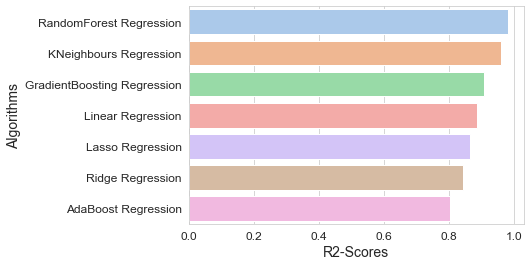

In [46]:
sns.barplot(x='R2-Scores' , y='Algorithms' , data=compare);

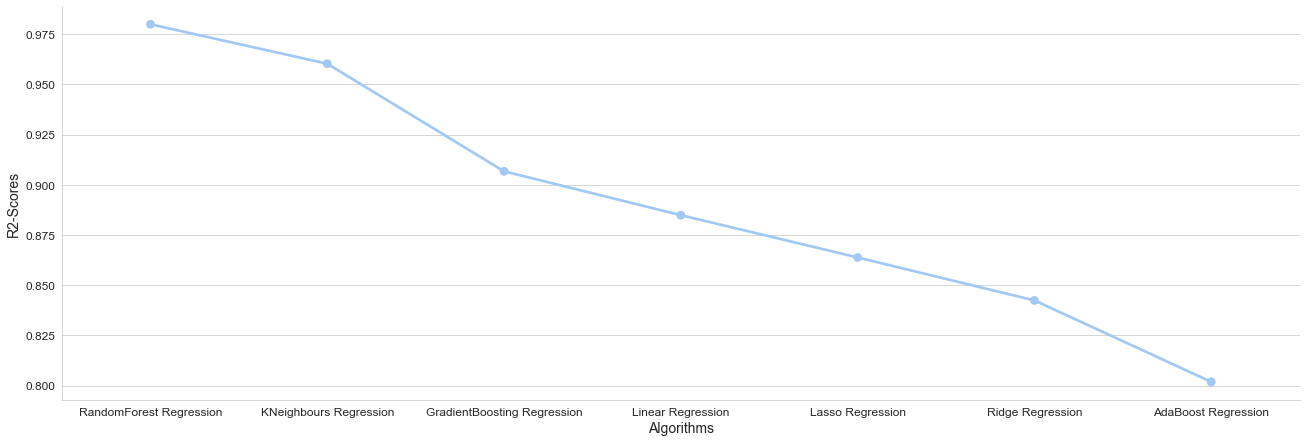

In [47]:
sns.factorplot(x='Algorithms', y='R2-Scores' , data=compare, size=6 , aspect=3);